d-sandbox

<div style="text-align: center; line-height: 0; padding-top: 9px;">
  <img src="https://databricks.com/wp-content/uploads/2018/03/db-academy-rgb-1200px.png" alt="Databricks Learning" style="width: 600px">
</div>

# Label Imbalance Lab

**Objective**: *Apply label balancing techniques to a random forest to optimize a recall metric.*

In this lab you will complete a series of guided exercises where you build a random forest to solve an imbalanced binary classification problem and apply both bootstrapping and record weighting to balance the data set. They should then compare the results to an unbalanced baseline that was given. When complete, please use your answers to the exercises to answer questions in the following quiz within Coursera.

In [0]:
%pip install imbalanced-learn

Python interpreter will be restarted.
Python interpreter will be restarted.


In [0]:
%run ../../Includes/Classroom-Setup

Mounting course-specific datasets to /mnt/training ... Datasets are already mounted to /mnt/training from s3a://databricks-corp-training/common

Out[2]: DataFrame[]

res5: Boolean = false

res6: Boolean = false

res7: Boolean = false

## Exercise 1

In this exercise, you will use the user-level lifestyle table. Run the following cell to make sure you can access the `adsda.ht_user_metrics_lifestyle` table.

In [0]:
dbutils.fs.ls("adsda")

Out[6]: [FileInfo(path='dbfs:/adsda/ht-daily-metrics-agg/', name='ht-daily-metrics-agg/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/adsda/ht-user-metrics-lab/', name='ht-user-metrics-lab/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/adsda/ht-user-metrics-lifestyle/', name='ht-user-metrics-lifestyle/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/adsda/ht-user-metrics-pca/', name='ht-user-metrics-pca/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/adsda/ht-user-metrics-pca-lab/', name='ht-user-metrics-pca-lab/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/adsda/ht_daily_metrics/', name='ht_daily_metrics/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/adsda/ht_user_metrics_lifestyle/', name='ht_user_metrics_lifestyle/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/adsda/ht_users/', name='ht_users/', size=0, modificationTime=0)]

In [0]:
%sql
SELECT *
FROM adsda.ht_user_metrics_lifestyle
LIMIT 10

avg_resting_heartrate,avg_active_heartrate,avg_bmi,avg_vo2,avg_workout_minutes,avg_steps,lifestyle
82.68379727873081,139.43487473206162,22.398063650890794,20.99401157735923,5.5026324666656405,5171.495890410959,Sedentary
77.73294228506452,127.05715346661702,25.150812654086298,25.52747526955064,37.2167018100805,7115.591780821917,Weight Trainer
86.51162895591307,147.31573126952208,19.148256000462478,19.448406520026342,45.00008651086257,7257.693150684931,Weight Trainer
77.55054135762612,129.5770039396946,24.240375728856797,21.40130178285617,37.886068725488464,7129.690410958904,Weight Trainer
68.93310580458204,136.50268661405897,30.726595797380472,28.855230169253637,32.24198398599063,6958.378082191781,Weight Trainer
69.31244794850774,167.18585016710105,27.1326690342849,30.939205114246853,5.119426899323105,5128.024657534246,Sedentary
64.64397544858174,152.9654977304546,29.17716498363452,28.92795344089978,5.015081852287961,5167.789041095891,Sedentary
81.33282756113321,137.57131998347788,20.850071485672633,22.564006304582495,42.375521457262316,7281.586301369863,Weight Trainer
64.79507042723496,139.39836367080545,31.386431213715433,29.096510773429188,33.3298371336183,7029.608219178082,Weight Trainer
89.51117796589962,126.57048164605168,19.830753716401606,19.750462151303648,43.30528046136424,7362.769863013698,Weight Trainer


Fill in the following cell to create a Pandas DataFrame from the Spark table.

In [0]:
# TODO
ht_metrics_pd_df = spark.table("adsda.ht_user_metrics_lifestyle").toPandas()

## Exercise 2

In this exercise, encode the `lifestyle` column by passing a dictionary of all values to the `lifestyle`. 

Use the following values:  `Sedentary` should be a 0 and all other classes should be 1. 

Fill in the blanks in the below code block.

In [0]:
# TODO
ht_metrics_pd_df['lifestyle_cat'] = ht_metrics_pd_df['lifestyle'].map({'Sedentary':0, 'Weight Trainer':1, 'Athlete':1, 'Cardio Enthusiast':1 })

## Exercise 3

In this exercise, you will build a random forest classification model.

We will once again try to predict a user's `lifestyle` using their other metrics.

Before splitting the data and fitting the model, import the packages you will need from sklearn for the train test split and the random forest classifier.

In [0]:
# TODO
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [0]:
# TODO
X = ht_metrics_pd_df.drop("lifestyle_cat", axis=1).drop("lifestyle", axis=1)
y = ht_metrics_pd_df["lifestyle_cat"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_train_predicted = rf.predict(X_train)
y_test_predicted = rf.predict(X_test)

print("Accuracy on training set: ", round(rf.score(X_train, y_train),3))
print("Accuracy on test set: ", round(rf.score(X_test, y_test), 3))

Accuracy on training set:  1.0
Accuracy on test set:  1.0


**Coursera Quiz:** For the base `rf` model, what is the accuracy score on the training and test set?

## Exercise 4

Change the `class_weight` parameter to `balanced`, and compute the accuracy and print the confusion matrix on the test set.

In [0]:
# TODO
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(class_weight="balanced")
rf.fit(X_train, y_train)

print(rf.score(X_test, y_test))
print(accuracy_score(y_test, rf.predict(X_test)))

1.0
1.0


**Coursera Quiz:** For the class weight balanced model, what is the accuracy score on the test set?

**Coursera Quiz:** For the class weight balanced model, what is the total delta of True Negatives from the base Random Forest model?

Out[45]: <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x7f06d01e1370>

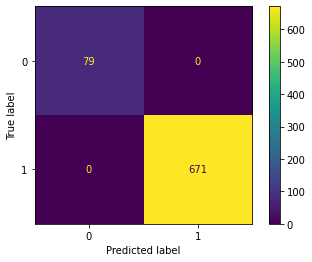

In [0]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = ConfusionMatrixDisplay.from_estimator(rf, X_test, rf.predict(X_test))
cm

## Exercise 5

Choose a `sampling strategy` of `minority`. Then fit and score a random forest model.

In [0]:
# TODO
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy = 'minority')

Create an oversample of the features and target.

In [0]:
# TODO
X_over, y_over = oversample.fit_resample(X_train, y_train)

print(y_over.value_counts())

0    2017
1    2017
Name: lifestyle_cat, dtype: int64


Create a train test split with the resampled data

In [0]:
# TODO
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over)

**Coursera Quiz:** How many of our `sedentary` class do we now have in our train set?

In [0]:
# TODO 
y_train.value_counts()

Out[53]: 1    1515
0    1510
Name: lifestyle_cat, dtype: int64

Fit a model with the new train test split and print the confusion matrix

In [0]:
# TODO
rf = RandomForestClassifier()

rf.fit(X_train, y_train)
print(rf.score(X_test, y_test))
print(confusion_matrix(y_test, rf.predict(X_test)))

1.0
[[507   0]
 [  0 502]]


**Coursera Quiz:** For the class weight balanced model, what is the accuracy score on the test set?

**Coursera Quiz:** For the class weight balanced model, what is the total delta of True Negatives from the base Random Forest model?

Out[57]: <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x7f06ced210a0>

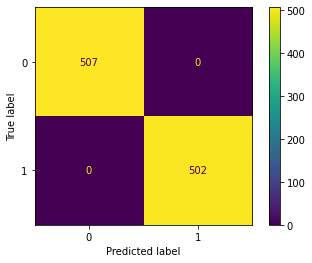

In [0]:
ConfusionMatrixDisplay.from_estimator(rf, X_test, rf.predict(X_test))

-sandbox
&copy; 2021 Databricks, Inc. All rights reserved.<br/>
Apache, Apache Spark, Spark and the Spark logo are trademarks of the <a href="http://www.apache.org/">Apache Software Foundation</a>.<br/>
<br/>
<a href="https://databricks.com/privacy-policy">Privacy Policy</a> | <a href="https://databricks.com/terms-of-use">Terms of Use</a> | <a href="http://help.databricks.com/">Support</a>